![](../nci-logo.png)

---------

# Web Coverage Service (WCS)
## Requesting GeoTIFF data through NCI's THREDDS Data Server




### In this notebook:

- <a href='#getcoverage'>Constructing WCS GetCoverage Requests</a>

- <a href='#gdal'>Extra exercise: Verifying request with GDAL in Python</a>


#### The following material uses Geoscience Australia's Landsat 8 Data Collection which is available under the Creative Commons License 4.0. For more information on the collection and licensing, please [click here](http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/3a2cd509-0e82-4381-98c7-522756da533b). 

---------

<br>


<a id='wcs'></a> 
## Web Coverage Service (WCS)

NCI's THREDDS Data Server supports OGC's Web Coverage Service (WCS) for gridded data collections. The WCS service allows users to request data or subsets of data in either NetCDF3, GeoTIFF, or GeoTIFF-float format. 

<a id='getcoverage'></a> 
### Constructing `GetCoverage` Requests

To extract data through the Web Coverage Service, a `GetCoverage` URL request needs to be constructed. 


**The request takes the following form:**

> `http://dapds00.nci.org.au/thredds/wcs/<thredds-path-to-data-file>?`<FONT COLOR="red">service</FONT>=WCS&<FONT COLOR="red">version</FONT>=1.0.0&<FONT COLOR="red">request</FONT>=GetCoverage&<FONT COLOR="red">coverage</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="red">format</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">bbox</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">time</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">crs</FONT>=<FONT COLOR="#00cc99">value</FONT>value

where <FONT COLOR="red">red</FONT> indicates required fields, <FONT COLOR="blue">blue</FONT> are optional, and <FONT COLOR="00cc99">green</FONT> are where inputs values relevant to the dataset and user request need to be defined. 

**GetCoverage parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WCS                                                          |
|version      |     Required        |  `1.0.0`                                                          |
|request      |     Required        | `GetCoverage`                                                     |
|coverage     |     Required        | `<variable>`                                                      |
|format       |     Required        | `GeoTIFF  `, `GeoTIFF_Float  `, `NetCDF3  `                       |
|bbox`*`         |     Required/Optional        | `<xmin,ymin,xmax,ymax>`                                           |
|time`*`         |     Required/Optional        | `<time_value>`                                                    |
|srs, or crs  |     Optional        | `<srs_value>` or `<crs_value>`                                    |

`*`For large files and/or files with a time dimension, these might be necessary. If `bbox` is not defined the entire spatial domain will be returned (if server limits allow) and if `time` is not specified, either the first or sometimes last timestep is returned. 

#### Once providing the appropriate values for the dataset, a URL can now be generated that will return the requested coverage (in this example the output is returned in the GeoTIFF format):
(When selecting or inputing this URL into a web browser, a file download should commence.)
>http://dapds00.nci.org.au/thredds/wcs/rs0/datacube/002/LS8_OLI_NBART/-10_-11/LS8_OLI_NBART_3577_-10_-11_20160109015321000000.nc?service=WCS&version=1.0.0&request=GetCoverage&coverage=nir&format=GeoTIFF&time=2016-01-09T01:53:21Z


<br></br>

#### Where to find the valid input values?

The WCS link on NCI's THREDDS catalog page will retrieve a WCS `GetCapabilities` request. This provides a list of the valid WCS operations and parameters, which can be helpful in constructing `GetCoverage` requests. If the `request=` option in the URL is changed to `DescribeCoverage`, additional information can be found. 

Start by selecting the desired file from NCI THREDDS Catalog page: 

http://dapds00.nci.org.au/thredds/catalog/rs0/datacube/002/LS8_OLI_NBART/-10_-11/catalog.html?dataset=LS8_OLI_NBART/-10_-11/LS8_OLI_NBART_3577_-10_-11_20160109015321000000.nc

<img src="./images/thredds13.png">

Then by selecting the **WCS** link:

<img src="./images/thredds14.png">

This will display the `GetCapabilities` page:

<img src="./images/thredds15.png">



> **GetCapabilities example:**

>http://dapds00.nci.org.au/thredds/wcs/rs0/datacube/002/LS8_OLI_NBAR/-10_-11/LS8_OLI_NBAR_3577_-10_-11_20160109015321000000.nc?service=WCS&version=1.0.0&request=GetCapabilities



> **DescribeCoverage example:**

>http://dapds00.nci.org.au/thredds/wcs/rs0/datacube/002/LS8_OLI_NBAR/-10_-11/LS8_OLI_NBAR_3577_-10_-11_20160109015321000000.nc?service=WCS&version=1.0.0&request=DescribeCoverage



<br>
<br>
<br>

# <br>
<br>
<br>


--------
**For more information on OGC standards specifications (WMS, WCS) and ncWMS:** <br \>
http://www.opengeospatial.org/standards/wms <br \>
http://www.opengeospatial.org/standards/wcs <br \>
https://reading-escience-centre.github.io/ncwms/ <br \>


<br>
<br>
<br>

<a id='gdal'></a> 
## Extra: Let's verify the request using GDAL

In [1]:
import gdal
import matplotlib.pyplot as plt 
%matplotlib inline

#### Open/extract data

In [2]:
ds = gdal.Open('./data/WCS346460317402991834.tif')
band = ds.GetRasterBand(1).ReadAsArray()

#### Plot

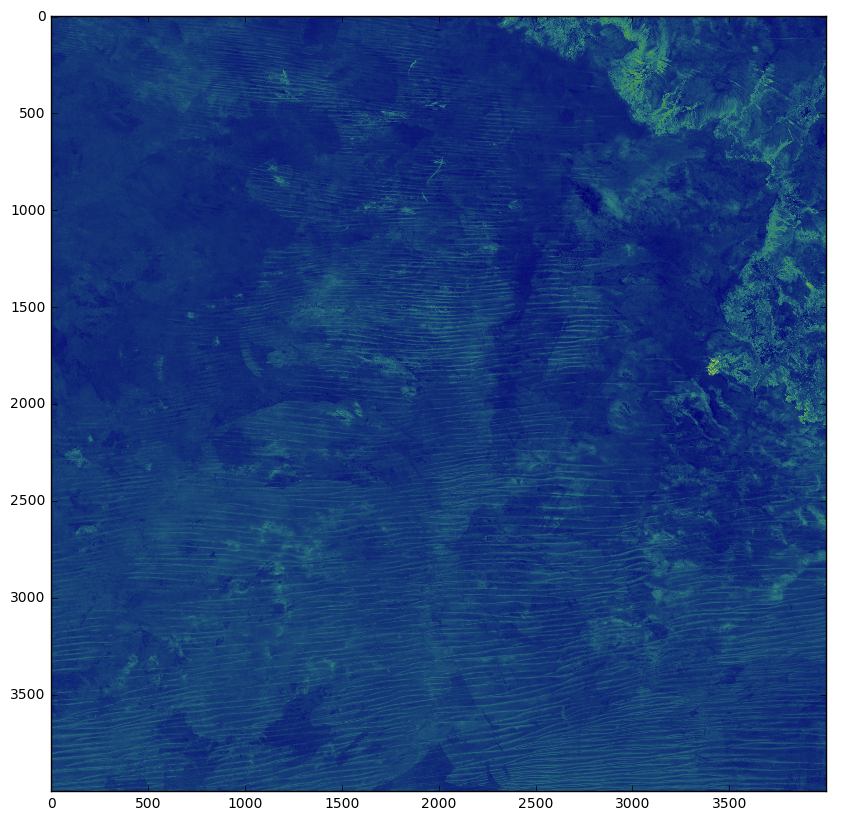

In [3]:
fig = plt.figure(figsize=(10,10))
plt.imshow(band, cmap='gist_earth')